In [27]:
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
# 日付データの特徴量
import pandas as pd
# 10時間の頻度の datetime 列
s = pd.date_range("2020-01-06", "2020-01-10", freq="10H").to_series()

In [11]:
# datetime から特徴量を
features = {
    "dayofweek": s.dt.dayofweek.values,
    "dayofyear": s.dt.dayofyear.values,
    "hour": s.dt.hour.values,
    "is_leap_year": s.dt.is_leap_year.values,
    "quater": s.dt.quarter.values,
    "weekofyear": s.dt.weekofyear.values
}

C:\Users\rebor\AppData\Local\Temp\ipykernel_16216\3496197773.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  "weekofyear": s.dt.weekofyear.values


In [12]:
features

{'dayofweek': array([0, 0, 0, 1, 1, 2, 2, 2, 3, 3], dtype=int64),
 'dayofyear': array([6, 6, 6, 7, 7, 8, 8, 8, 9, 9], dtype=int64),
 'hour': array([ 0, 10, 20,  6, 16,  2, 12, 22,  8, 18], dtype=int64),
 'is_leap_year': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 'quater': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 'weekofyear': array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)}

In [13]:
# p.147 のデータがないため作成
example_df = pd.DataFrame([
  {
    "date": "2016-09-01",
    "customer_id": 146361,
    "cat1": 2,
    "cat2": 2,
    "cat3": 0,
    "num1": -0.518679
  },
  {
    "date": "2017-04-01",
    "customer_id": 180838,
    "cat1": 4,
    "cat2": 1,
    "cat3": 0,
    "num1": 0.415853
  },
  {
    "date": "2017-08-01",
    "customer_id": 157857,
    "cat1": 3,
    "cat2": 3,
    "cat3": 1,
    "num1": -2.061687
  },
  {
    "date": "2017-12-01",
    "customer_id": 159772,
    "cat1": 5,
    "cat2": 1,
    "cat3": 1,
    "num1": -0.276558
  },
  {
    "date": "2017-09-01",
    "customer_id": 80014,
    "cat1": 3,
    "cat2": 2,
    "cat3": 1,
    "num1": -1.456827
  }
])

In [14]:
example_df.head()

,date,customer_id,cat1,cat2,cat3,num1
0,2016-09-01,146361,2,2,0,-0.518679
1,2017-04-01,180838,4,1,0,0.415853
2,2017-08-01,157857,3,3,1,-2.061687
3,2017-12-01,159772,5,1,1,-0.276558
4,2017-09-01,80014,3,2,1,-1.456827


In [18]:
def genearate_features(df: pd.DataFrame):
    # date列から特徴量抽出
    df.loc[:, "year"] = df["date"].dt.year
    df.loc[:, "weekofyear"] = df["date"].dt.weekofyear
    df.loc[:, "month"] = df["date"].dt.month
    df.loc[:, "dayofweek"] = df["date"].dt.dayofweek
    df.loc[:, "weekend"] = (df["date"].dt.weekday >= 5).astype(int)
    
    # 集約用の辞書
    aggs = {}
    # 月と曜日を対象にした種類数と平均の算出
    aggs["month"] = ["nunique", "mean"]
    aggs["weekofyear"] = ["nunique", "mean"]
    # num1を対象に合計・最大・最小・平均の算出
    aggs["num1"] = ["sum", "max", "min", "mean"]
    # customer_idを対象にした登場回数の算出
    aggs["customer_id"] = ["size"]
    # customer_idを対象にした種類数の算出
    aggs["customer_id"] = ["nunique"]
    
    # customer_id を軸に集約
    agg_df = df.groupby("customer_id").agg(aggs)
    agg_df = agg_df.reset_index()
    return agg_df

In [19]:
example_df["date"] = pd.to_datetime(example_df["date"])

In [20]:
example_result = genearate_features(example_df)

C:\Users\rebor\AppData\Local\Temp\ipykernel_16216\4292702500.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df.loc[:, "weekofyear"] = df["date"].dt.weekofyear


In [21]:
example_result.head()

customer_id   month       weekofyear            num1                      \
              nunique  mean    nunique  mean       sum       max       min   
0       80014       1   9.0          1  35.0 -1.456827 -1.456827 -1.456827   
1      146361       1   9.0          1  35.0 -0.518679 -0.518679 -0.518679   
2      157857       1   8.0          1  31.0 -2.061687 -2.061687 -2.061687   
3      159772       1  12.0          1  48.0 -0.276558 -0.276558 -0.276558   
4      180838       1   4.0          1  13.0  0.415853  0.415853  0.415853   

            customer_id  
       mean     nunique  
0 -1.456827           1  
1 -0.518679           1  
2 -2.061687           1  
3 -0.276558           1  
4  0.415853           1

In [22]:
import numpy as np
# 100行2列の [0,1) の一様分布乱数のデータフレーム
df = pd.DataFrame(
    np.random.rand(100, 2),
    columns=[f"f_{i}" for i in range(1, 3)]
)
df.head()

,f_1,f_2
0,0.341133,0.413780
1,0.646057,0.463914
2,0.418842,0.592280
3,0.442733,0.697253
4,0.872779,0.900086


In [23]:
# 2次の多項式特徴量（a, b, ab, a^2 b^2）を作成
from sklearn import preprocessing
pf = preprocessing.PolynomialFeatures(
    degree=2,
    interaction_only=False,
    include_bias=False
)
pf.fit(df)

PolynomialFeatures(include_bias=False)

In [24]:
poly_feats = pf.transform(df)
type(poly_feats)

numpy.ndarray

In [25]:
# DataFrame作成
num_feats = poly_feats.shape[1]
df_transformed = pd.DataFrame(poly_feats, columns=[f"f_{i}" for i in range(1, num_feats + 1)])
df_transformed.head()

,f_1,f_2,f_3,f_4,f_5
0,0.341133,0.413780,0.116372,0.141154,0.171214
1,0.646057,0.463914,0.417390,0.299715,0.215216
2,0.418842,0.592280,0.175429,0.248072,0.350796
3,0.442733,0.697253,0.196012,0.308697,0.486162
4,0.872779,0.900086,0.761743,0.785576,0.810154


In [26]:
# 量的変数の列を10個のbinに分割
df["f_bin_10"] = pd.cut(df["f_1"], bins=10, labels=False)
# 量的変数の列を100個のビンに分割
df["f_bin_100"] = pd.cut(df["f_1"], bins=100, labels=False)
df.head()

,f_1,f_2,f_bin_10,f_bin_100
0,0.341133,0.413780,3,34
1,0.646057,0.463914,6,64
2,0.418842,0.592280,4,41
3,0.442733,0.697253,4,44
4,0.872779,0.900086,8,87


In [29]:
# 分散の大きい特徴量を追加
rng = np.random.default_rng()
df["f_3"] = np.round(rng.uniform(high=10000.0, size=(100, 1)))
df.head()

,f_1,f_2,f_bin_10,f_bin_100,f_3
0,0.341133,0.413780,3,34,185.0
1,0.646057,0.463914,6,64,6295.0
2,0.418842,0.592280,4,41,4532.0
3,0.442733,0.697253,4,44,864.0
4,0.872779,0.900086,8,87,9943.0


(array([14., 12.,  4., 11., 10., 12.,  8., 11.,  8., 10.]),
 array([ 185. , 1160.8, 2136.6, 3112.4, 4088.2, 5064. , 6039.8, 7015.6,
        7991.4, 8967.2, 9943. ]),
 <BarContainer object of 10 artists>)

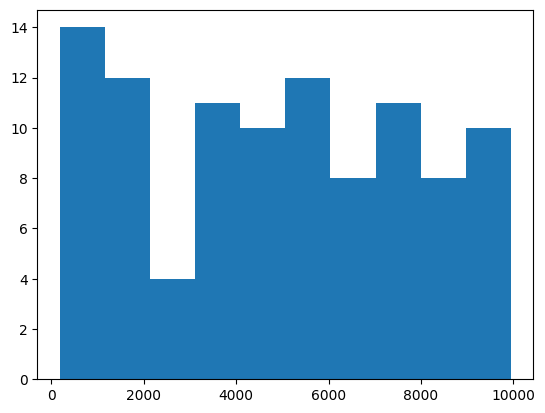

In [30]:
plt.hist(df["f_3"])

In [31]:
df["f_3"].var()

8482232.534444444

In [32]:
# 対数を取る
df["f_3"].apply(lambda x: np.log(1 + x)).var()

0.8861137630805014

(array([ 2.,  1.,  4.,  4.,  4., 11.,  4., 15., 25., 30.]),
 array([5.22574667, 5.62364447, 6.02154227, 6.41944006, 6.81733786,
        7.21523565, 7.61313345, 8.01103125, 8.40892904, 8.80682684,
        9.20472463]),
 <BarContainer object of 10 artists>)

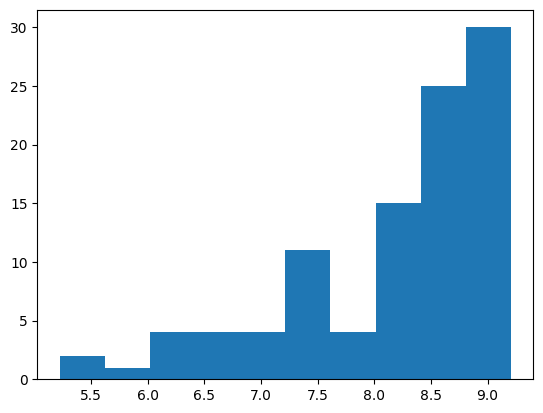

In [33]:
plt.hist(df["f_3"].apply(lambda x: np.log(1 + x)))

In [34]:
# K近傍法で量的変数の欠損値補完
from sklearn import impute

# 1~15 の値をランダムに取る 10 * 6 の行列
X = np.random.randint(1, 15, (10, 6)).astype(float)
# ランダムに10個欠損値にするための乱数生成
np.random.choice(X.size, 10)

array([42, 45, 22, 37, 47,  7,  3, 52, 25, 30])

In [36]:
# ランダムに10個欠損値にする
X.ravel()[np.random.choice(X.size, 10)] = np.nan
print(X)

[[ 4. nan 13.  8. 10. 10.]
 [ 6. 10. nan  5. nan nan]
 [14. nan nan  7. 14. 14.]
 [ 1. nan nan  6. 10. nan]
 [ 3. 10. 14. 14.  7. 13.]
 [ 9. 11.  4.  1.  8.  3.]
 [ 7.  8.  1.  1.  9.  2.]
 [ 4.  1. 12.  1.  7. nan]
 [ 2.  6. 13. 11.  9.  2.]
 [ 8. 10. 12.  5.  8.  5.]]


In [37]:
# 2つの近傍を利用して欠損値補完
knn_imputer = impute.KNNImputer(n_neighbors=2)
knn_imputer.fit_transform(X)

array([[ 4. , 10. , 13. ,  8. , 10. , 10. ],
       [ 6. , 10. , 12.5,  5. ,  9. ,  7.5],
       [14. , 10. , 12.5,  7. , 14. , 14. ],
       [ 1. ,  8. , 13. ,  6. , 10. ,  6. ],
       [ 3. , 10. , 14. , 14. ,  7. , 13. ],
       [ 9. , 11. ,  4. ,  1. ,  8. ,  3. ],
       [ 7. ,  8. ,  1. ,  1. ,  9. ,  2. ],
       [ 4. ,  1. , 12. ,  1. ,  7. ,  7.5],
       [ 2. ,  6. , 13. , 11. ,  9. ,  2. ],
       [ 8. , 10. , 12. ,  5. ,  8. ,  5. ]])